In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_temp = pd.read_csv("DataSet/TEMP_EXPERIMENT-1.csv")
df_strain = pd.read_csv("TEMP EXPERIMENT-2.csv")
df_both = pd.read_csv("TEMP AND STRAIN EXPERIMENT-3.csv")

In [3]:
df_temp["session_id"] = 1
df_strain["session_id"] = 2
df_both["session_id"] = 3


In [4]:
print("Temperature")
print(df_temp.head())
print("Strain")
print(df_strain.head())
print("Both temperature and the Strain")
print(df_both.head())

Temperature
   Time(sec)  CH1  CH2  CH3  CH4  Wavelength  session_id
0   0.199997    1    0    0    0  1523.66538           1
1   0.399995    1    0    0    0  1523.66349           1
2   0.599993    1    0    0    0  1523.66349           1
3   0.799991    1    0    0    0  1523.66726           1
4   0.999989    1    0    0    0  1523.66726           1
Strain
   Time(sec)  CH1  CH2  CH3  CH4  Wavelength  session_id
0   0.199998    1    0    0    0  1524.60998           2
1   0.399996    1    0    0    0  1524.60847           2
2   0.599994    1    0    0    0  1524.60809           2
3   0.799991    1    0    0    0  1524.60809           2
4   0.999989    1    0    0    0  1524.60998           2
Both temperature and the Strain
   Time(sec)  CH1  CH2  CH3  CH4  Wavelength  session_id
0   0.199998    1    0    0    0  1524.22429           3
1   0.399996    1    0    0    0  1524.22240           3
2   0.599994    1    0    0    0  1524.22240           3
3   0.799992    1    0    0    0  152

##### Checking for thr null values using HEATMAP

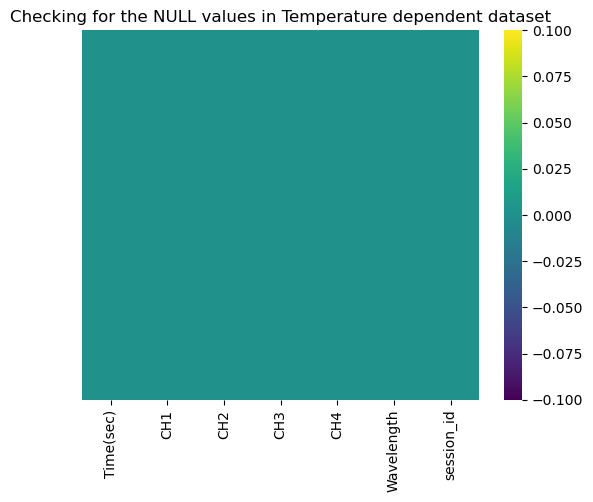

In [5]:
sns.heatmap(df_temp.isnull() , cbar = True , cmap = 'viridis' , yticklabels = False)
plt.title("Checking for the NULL values in Temperature dependent dataset")
plt.show()

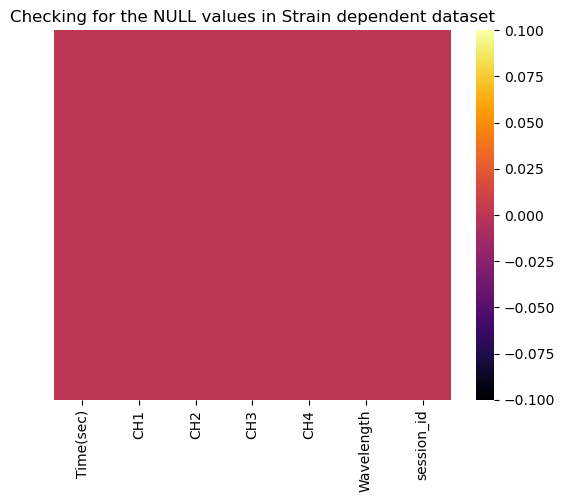

In [6]:
sns.heatmap(df_strain.isnull() , cbar = True , cmap = 'inferno' , yticklabels = False)
plt.title("Checking for the NULL values in Strain dependent dataset")
plt.show()

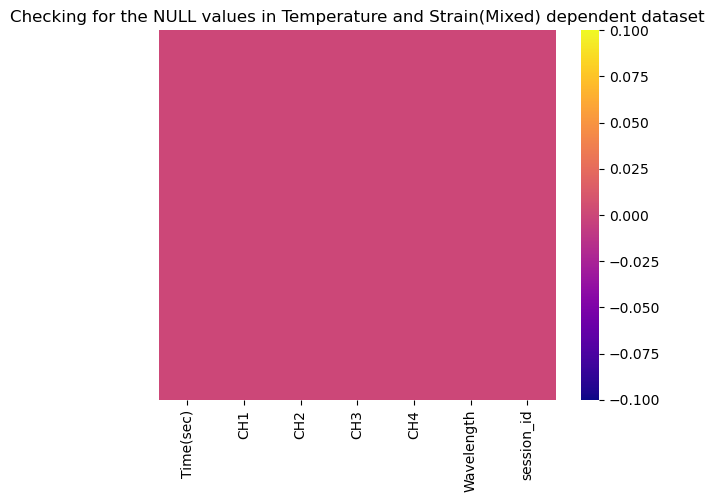

In [7]:
sns.heatmap(df_both.isnull() , cbar = True , cmap = 'plasma' , yticklabels = False)
plt.title("Checking for the NULL values in Temperature and Strain(Mixed) dependent dataset")
plt.show()

In [8]:
print("Temperature : ",end="")
print(df_temp.shape)
print("Strain : ",end="")
print(df_strain.shape)
print("Temperature  and Strain : ",end="")
print(df_both.shape)


Temperature : (3059, 7)
Strain : (3838, 7)
Temperature  and Strain : (9063, 7)


##### Plotting the Histogram and thus obtaining the mean value by plotting the Normal Deviation curve

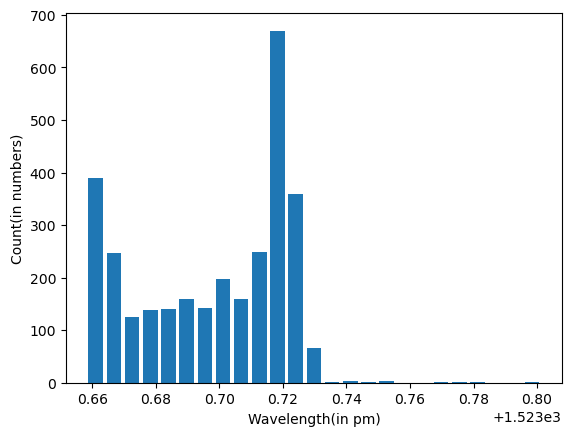

In [9]:
plt.hist(df_temp['Wavelength'] , bins = 25 , rwidth = 0.8)
plt.xlabel('Wavelength(in pm)')
plt.ylabel('Count(in numbers)')
plt.show()

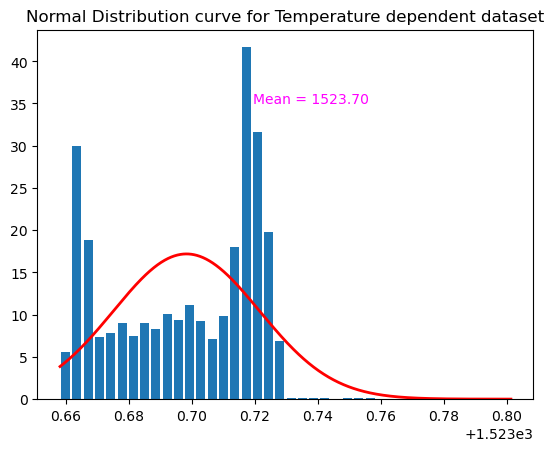

In [8]:
# Normal Deviation curve
from scipy.stats import norm

rng = np.linspace(df_temp['Wavelength'].min() , df_temp['Wavelength'].max() , 1000)
plt.hist(df_temp['Wavelength'],density = True , bins = 40 , rwidth = 0.8)
plt.plot(rng , norm.pdf(rng , df_temp.Wavelength.mean() ,df_temp.Wavelength.std() ) , 'r-' , linewidth = 2)

# to show the mean value on the curve
plt.text(df_temp['Wavelength'].mean()+0.021 , 35 , f"Mean = {df_temp.Wavelength.mean():.2f}" , color = 'magenta')
plt.title("Normal Distribution curve for Temperature dependent dataset")
plt.show()

In [9]:
lower,higher = [df_temp['Wavelength'].mean() - 3*df_temp['Wavelength'].std(),df_temp['Wavelength'].mean() + 3*df_temp['Wavelength'].std()]
print(lower)
print(higher)

1523.6286910106076
1523.7679694535966


In [10]:
# Removing the Outliers in the Temperature dependent dataset
df_temp = df_temp[(df_temp['Wavelength'] > lower) & (df_temp['Wavelength'] <higher)]
print("The shape of Dataset after removing the outliers : " ,  df_temp.shape)

The shape of Dataset after removing the outliers :  (3054, 7)


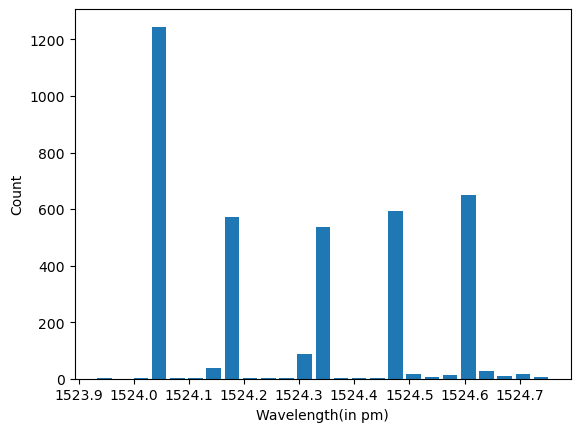

In [11]:
# For strain dependent dataset
plt.hist(df_strain['Wavelength'] , bins = 25 , rwidth = 0.8)
plt.xlabel("Wavelength(in pm)")
plt.ylabel("Count")
plt.show()

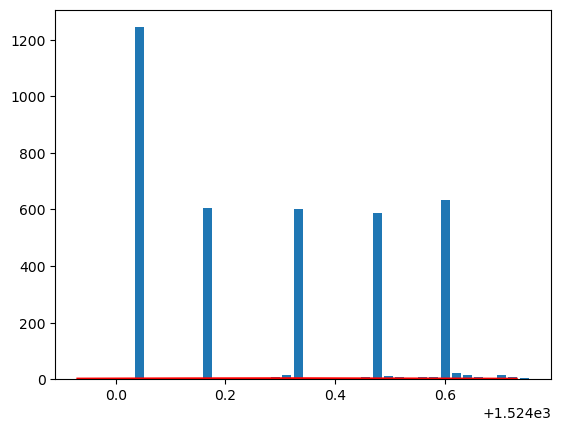

In [12]:
from scipy.stats import norm
plt.hist(df_strain['Wavelength'],bins = 40 , rwidth = 0.8)
rng = np.arange(df_strain['Wavelength'].min() , df_strain['Wavelength'].max() , 0.2)
plt.plot(rng , norm.pdf(rng , df_strain['Wavelength'].mean() , df_strain['Wavelength'].std()) , 'r-' , linewidth = 2)

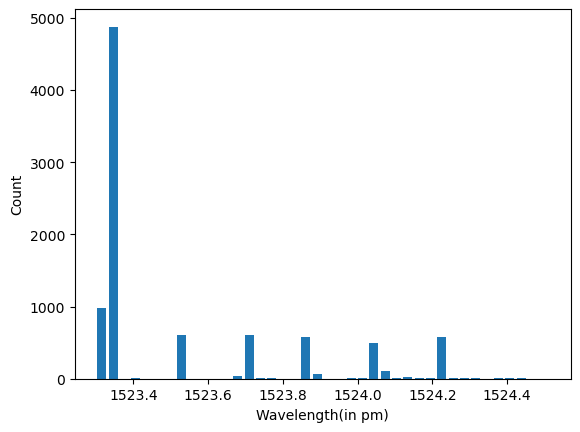

In [13]:
# for Both TEMP and STRAIN dependent dataset
plt.hist(df_both['Wavelength'] , bins = 40 , rwidth = 0.8)
plt.xlabel("Wavelength(in pm)")
plt.ylabel("Count")
plt.show()

In [14]:
# We cant remove the outliers for the Strain and both(temp and strain) dependent dataset as theres as they varies stepwise

In [15]:
df_temp.describe()

,Time(sec),CH1,CH2,CH3,CH4,Wavelength,session_id
count,3054.000000,3054.0,3054.0,3054.0,3054.0,3054.000000,3054.0
mean,305.745265,1.0,0.0,0.0,0.0,1523.698187,1.0
std,176.673497,0.0,0.0,0.0,0.0,0.022953,0.0
min,0.199997,1.0,0.0,0.0,0.0,1523.658200,1.0
25%,152.848401,1.0,0.0,0.0,0.0,1523.676370,1.0
50%,305.496806,1.0,0.0,0.0,0.0,1523.703840,1.0
75%,458.145213,1.0,0.0,0.0,0.0,1523.718790,1.0
max,611.793610,1.0,0.0,0.0,0.0,1523.755230,1.0


In [16]:
df_both.describe()

,Time(sec),CH1,CH2,CH3,CH4,Wavelength,session_id
count,9063.000000,9063.0,9063.0,9063.0,9063.0,9063.000000,9063.0
mean,906.390611,1.0,0.0,0.0,0.0,1523.530084,3.0
std,523.275998,0.0,0.0,0.0,0.0,0.295580,0.0
min,0.199998,1.0,0.0,0.0,0.0,1523.300410,3.0
25%,453.295301,1.0,0.0,0.0,0.0,1523.335940,3.0
50%,906.390608,1.0,0.0,0.0,0.0,1523.350580,3.0
75%,1359.485919,1.0,0.0,0.0,0.0,1523.698340,3.0
max,1812.581234,1.0,0.0,0.0,0.0,1524.512990,3.0


In [17]:
df_strain.describe()

,Time(sec),CH1,CH2,CH3,CH4,Wavelength,session_id
count,3838.000000,3838.0,3838.0,3838.0,3838.0,3838.000000,3838.0
mean,383.895912,1.0,0.0,0.0,0.0,1524.288892,2.0
std,221.613546,0.0,0.0,0.0,0.0,0.216644,0.0
min,0.199998,1.0,0.0,0.0,0.0,1523.930610,2.0
25%,192.047948,1.0,0.0,0.0,0.0,1524.050520,2.0
50%,383.895907,1.0,0.0,0.0,0.0,1524.325550,2.0
75%,575.743874,1.0,0.0,0.0,0.0,1524.478370,2.0
max,767.591848,1.0,0.0,0.0,0.0,1524.755070,2.0


#### Featuring the Data

In [18]:
dt = 0.5
def sliding_features(x,windows=50):
    df = pd.DataFrame({'x':x})
    df['mean'] = df['x'].rolling(windows).mean()
    df['std'] = df['x'].rolling(windows).std()
    df['slope'] = df['x'].diff(periods=5)/(dt*5)
    df['skew'] = df['x'].rolling(windows).skew()
    df['kurtosis'] = df['x'].rolling(windows).kurt()
    return df.dropna().reset_index(drop=True)

In [19]:
featured_temp = sliding_features(df_temp['Wavelength'])
featured_strain = sliding_features(df_strain['Wavelength'])
featured_both = sliding_features(df_both['Wavelength'])

featured_temp = featured_temp.rename(columns={'x': 'Wavelength'})
featured_strain = featured_strain.rename(columns={'x': 'Wavelength'})
featured_both = featured_both.rename(columns={'x': 'Wavelength'})

print("Featured Temperature dependent")
print(featured_temp.head(5))
print("Featured Strain dependent")
print(featured_strain.head(5))
print("Featured depending on both")
print(featured_both.head(5))

Featured Temperature dependent
   Wavelength         mean       std     slope      skew  kurtosis
0  1523.66556  1523.664844  0.001161  0.000000  0.322833 -0.768271
1  1523.66556  1523.664848  0.001163  0.000756  0.314397 -0.786710
2  1523.66367  1523.664851  0.001159  0.000000  0.319844 -0.776400
3  1523.66537  1523.664889  0.001144  0.000680  0.267359 -0.740826
4  1523.66367  1523.664817  0.001104 -0.000756  0.261884 -0.777677
Featured Strain dependent
   Wavelength         mean       std     slope      skew  kurtosis
0  1524.60808  1524.608469  0.001434 -0.000908 -0.617829 -0.271642
1  1524.60619  1524.608394  0.001453 -0.001512 -0.537250 -0.445421
2  1524.60676  1524.608359  0.001471 -0.001060 -0.474029 -0.595181
3  1524.60808  1524.608359  0.001471  0.000000 -0.473582 -0.595705
4  1524.60997  1524.608397  0.001488  0.000756 -0.509508 -0.628565
Featured depending on both
   Wavelength         mean       std     slope      skew  kurtosis
0  1524.21731  1524.221668  0.002548  0.00000

In [20]:
featured_temp['shift'] = featured_temp['Wavelength'] - featured_temp['Wavelength'].iloc[0]
featured_temp.head()

,Wavelength,mean,std,slope,skew,kurtosis,shift
0,1523.66556,1523.664844,0.001161,0.000000,0.322833,-0.768271,0.00000
1,1523.66556,1523.664848,0.001163,0.000756,0.314397,-0.786710,0.00000
2,1523.66367,1523.664851,0.001159,0.000000,0.319844,-0.776400,-0.00189
3,1523.66537,1523.664889,0.001144,0.000680,0.267359,-0.740826,-0.00019
4,1523.66367,1523.664817,0.001104,-0.000756,0.261884,-0.777677,-0.00189


In [21]:
featured_strain['shift'] = featured_strain['Wavelength'] - featured_strain['Wavelength'].iloc[0]
featured_strain

,Wavelength,mean,std,slope,skew,kurtosis,shift
0,1524.60808,1524.608469,0.001434,-0.000908,-0.617829,-0.271642,0.00000
1,1524.60619,1524.608394,0.001453,-0.001512,-0.537250,-0.445421,-0.00189
2,1524.60676,1524.608359,0.001471,-0.001060,-0.474029,-0.595181,-0.00132
3,1524.60808,1524.608359,0.001471,0.000000,-0.473582,-0.595705,0.00000
4,1524.60997,1524.608397,0.001488,0.000756,-0.509508,-0.628565,0.00189
...,...,...,...,...,...,...,...
3784,1524.04764,1524.048692,0.001221,-0.000376,0.025990,-0.450061,-0.56044
3785,1524.04952,1524.048730,0.001217,0.000376,-0.049906,-0.420473,-0.55856
3786,1524.04858,1524.048692,0.001191,0.000000,-0.020450,-0.284298,-0.55950
3787,1524.04858,1524.048673,0.001185,0.000000,0.021812,-0.230088,-0.55950


In [22]:
featured_both['shift'] = featured_both['Wavelength'] - featured_both['Wavelength'].iloc[0]
featured_both.head()

,Wavelength,mean,std,slope,skew,kurtosis,shift
0,1524.21731,1524.221668,0.002548,0.000004,-0.165840,-0.384261,0.00000
1,1524.21561,1524.221495,0.002659,-0.000676,-0.213483,-0.314139,-0.00170
2,1524.21504,1524.221348,0.002807,-0.001508,-0.276509,-0.313477,-0.00227
3,1524.21655,1524.221231,0.002883,-0.000528,-0.227270,-0.480496,-0.00076
4,1524.21504,1524.221083,0.003008,-0.000908,-0.233809,-0.554157,-0.00227


##### Model fitting and Training

#### One method of splitting the data using train_test_split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
def splitting(x,y):
    return train_test_split(x,y,test_size=0.2,random_state=50)

In [36]:
# splitting for Temperature dependent dataset
y_temp = np.linspace(20,80,len(featured_temp))
x_temp_train,x_temp_test,y_temp_train,y_temp_test = splitting(featured_temp,y_temp)
print(x_temp_train.shape," ",x_temp_test.shape," ",y_temp_train.shape," ",y_temp_test.shape)

(2404, 7)   (601, 7)   (2404,)   (601,)


In [37]:
from sklearn.linear_model import LinearRegression
# we are taking the range of temperature of 20-80 as FBG varies a linearly with temp in this range
model_temp = LinearRegression()
model_temp.fit(x_temp_train,y_temp_train)
print("worked well")

worked well


In [38]:
# Splitting the data for Strain dependent dataset
y_strain = np.linspace(0,1000,len(featured_strain))
x_strain_train,x_strain_test,y_strain_train,y_strain_test = splitting(featured_strain,y_strain)
print(x_strain_train.shape," ",x_strain_test.shape," ",y_strain_train.shape," ",y_strain_test.shape)

(3031, 7)   (758, 7)   (3031,)   (758,)


In [40]:
# smilarly for the strain we r taking the range of 0 to 1000
model_strain = LinearRegression()
model_strain.fit(x_strain_train , y_strain_train)
print("No issues, Worked Well!")

No issues, Worked Well!


In [41]:
y_temp_mix = np.linspace(20,80,len(featured_both))
y_strain_mix = np.linspace(0,1000,len(featured_both))
y_both = np.column_stack([y_temp_mix,y_strain_mix])
x_both_train,x_both_test,y_both_train,y_both_test = splitting(featured_both,y_both)
print(x_both_train.shape," ",x_both_test.shape," ",y_both_train.shape," ",y_both_test.shape)

(7211, 7)   (1803, 7)   (7211, 2)   (1803, 2)


In [42]:
# for the dataset that depends on both Temp and Strain - we are using MultiOutputRegressor and RandomForestREgressor
from sklearn.multioutput import MultiOutputRegressor 
from sklearn.ensemble import RandomForestRegressor
multi_model = MultiOutputRegressor(RandomForestRegressor())
multi_model.fit(x_both_train , y_both_train)
print("Working Well")

Working Well


###### Prediction

In [43]:
temp_pred = model_temp.predict(x_temp_test)
strain_pred = model_strain.predict(x_strain_test)
both_pred = multi_model.predict(x_both_test)
print("Temperature dependent Prediction : ",temp_pred[:7])
print("Strain dependent Prediction : ",strain_pred[:7])
print("Teperature and Strain dependent Prediction : ",both_pred[:7])

Temperature dependent Prediction :  [40.66174316 45.42407227 66.23486328 63.60107422 55.95410156 51.60461426
 48.57543945]
Strain dependent Prediction :  [804. 252. 440.  76.  68. 644.  72.]
Teperature and Strain dependent Prediction :  [[ 29.75357816 162.66392988]
 [ 44.09851326 397.71811088]
 [ 24.17077555  70.20636858]
 [ 56.5751692  618.25696217]
 [ 63.98353489 735.30345057]
 [ 75.84506823 929.98890492]
 [ 21.04748696  17.62343282]]


##### Nested Cross Validation and Metrics

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
def metrcs(y_true,y_pred):
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rmse = np.sqrt(mse)
    result = {
        "mean absolute error(mae)" : mae,
        "mean squared error(mse)" : mse,
        "root mean squared error(rmse)" : rmse
    }
    return result

In [48]:
# for the Temperature dependent dataset
y_temp_pred = temp_pred
res_temp = metrcs(y_temp_test,y_temp_pred)
print("Metrics for the dataset that depends on Temperature")
print(res_temp)

Metrics for the dataset that depends on Temperature
{'mean absolute error(mae)': 3.696777577153005, 'mean squared error(mse)': 17.95904402628186, 'root mean squared error(rmse)': 4.237811230609719}


In [49]:
# For Strain dependent dataset
y_strain_pred = strain_pred
res_strain = metrcs(y_strain_test, y_strain_pred)
print("Metrics for the dataset that depends on Strain")
print(res_strain)

Metrics for the dataset that depends on Strain
{'mean absolute error(mae)': 63.29276175563437, 'mean squared error(mse)': 6465.364079850971, 'root mean squared error(rmse)': 80.40748771010676}


In [42]:
from sklearn.metrics import r2_score
def r2score(y_test,y_pred):
    return r2_score(y_test,y_pred)

In [62]:
print("R2 score of Temperature dataset : ",r2score(y_temp_test,y_temp_pred)*100)
print("R2 score of Strain dataset : ",r2score(y_strain_test,y_strain_pred)*100)
print("R2 score of both dataset : ",r2score(y_both_test,y_both_pred)*100)

R2 score of Temperature dataset :  94.37145091614212
R2 score of Strain dataset :  92.3419143442162
R2 score of both dataset :  99.58932941270778


In [54]:
featured_both.head()
both_pred[:2]

array([[ 29.75357816, 162.66392988],
       [ 44.09851326, 397.71811088]])

In [51]:
# for the dataset that depends on both
y_both_pred = both_pred
res_both = metrcs(y_both_test,y_both_pred)
print("Metrics for the dataset that depends on both")
print(res_both)

Metrics for the dataset that depends on both
{'mean absolute error(mae)': 3.537024448620088, 'mean squared error(mse)': 173.77419170524422, 'root mean squared error(rmse)': 13.182343938209328}


#### Second Method of Splitting the Data

In [23]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupKFold
def group_kfold_cv(X, y, groups, n_splits=3):
    gkf = GroupKFold(n_splits=n_splits)
    folds = []
    for train_idx, test_idx in gkf.split(X, y, groups=groups):
        if hasattr(X, "iloc"):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        else:
            X_train, X_test = X[train_idx], X[test_idx]
        if hasattr(y, "iloc"):
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        else:
            y_train, y_test = y[train_idx], y[test_idx]
        folds.append((X_train, X_test, y_train, y_test))
    return folds



In [25]:
y_temp = np.linspace(20,80,len(featured_temp))
grp_temp = np.arange(len(featured_temp))%3
folds = group_kfold_cv(featured_temp, y_temp, grp_temp, n_splits=3)
x_temp_train, x_temp_test, y_temp_train, y_temp_test = folds[0]
print("Train shape:", x_temp_train.shape, y_temp_train.shape)
print("Test shape:", x_temp_test.shape, y_temp_test.shape)

Train shape: (2003, 7) (2003,)
Test shape: (1002, 7) (1002,)


In [26]:
y_strain = np.linspace(0,1000,len(featured_strain))
grp_str = np.arange(len(featured_strain))%3
folds = group_kfold_cv(featured_strain,y_strain,grp_str,n_splits=3)
x_strain_train,x_strain_test,y_strain_train,y_strain_test = folds[0]
print(x_strain_train.shape," ",x_strain_test.shape," ",y_strain_train.shape," ",y_strain_test.shape)

(2526, 7)   (1263, 7)   (2526,)   (1263,)


In [27]:
y_both = np.column_stack([np.linspace(20,80,len(featured_both)),np.linspace(0,1000,len(featured_both))])
grp_both = np.arange(len(featured_both))%3
folds = group_kfold_cv(featured_both,y_both,grp_both,n_splits=3)
x_both_train,x_both_test,y_both_train,y_both_test = folds[0]
print(x_both_train.shape," ",x_both_test.shape," ",y_both_train.shape," ",y_both_test.shape)

(6009, 7)   (3005, 7)   (6009, 2)   (3005, 2)


##### GridSearchCV

In [30]:
from sklearn.model_selection import GroupKFold,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
def gridcv(X_train,y_train,train_groups):
    param_grid = {
        "n_estimators": [100, 200, 300],
        "max_depth": [5, 10, None]
    }

    model = RandomForestRegressor(random_state=42)
    inner_cv = GroupKFold(n_splits=2)

    grid = GridSearchCV(model, param_grid, cv=inner_cv, scoring="neg_mean_squared_error")
    grid.fit(X_train, y_train, groups=train_groups)
    return grid


In [31]:
grp_temp = np.arange(len(x_temp_train))%3
grid_temp = gridcv(x_temp_train,y_temp_train,grp_temp)
grid_temp

GridSearchCV(cv=GroupKFold(n_splits=2),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [32]:
grp_strain = np.arange(len(x_strain_train))%3
grid_strain = gridcv(x_strain_train,y_strain_train,grp_strain)
grid_strain

GridSearchCV(cv=GroupKFold(n_splits=2),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [33]:
grp_both = np.arange(len(x_both_train))%3
print("Mixed Dataset : ",gridcv(x_both_train,y_both_train,grp_both))
grid_both = gridcv(x_both_train,y_both_train,grp_both)
grid_both

Mixed Dataset :  GridSearchCV(cv=GroupKFold(n_splits=2),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')


GridSearchCV(cv=GroupKFold(n_splits=2),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [34]:
def prediction(x,y,grp):
    grid = gridcv(x,y,grp)
    best_model = grid.best_estimator_
    return best_model.predict(x)

In [35]:
grp_tempte = np.arange(len(y_temp_test))%3
y_temp_pred = prediction(x_temp_test,y_temp_test,grp_tempte)
print(y_temp_pred)

[20.75758988 20.17336884 20.25306258 ... 79.8322237  79.84300932
 79.74833555]


In [36]:
grp_strtest = np.arange(len(y_strain_test))%3
y_strain_pred = prediction(x_strain_test,y_strain_test,grp_strtest)
print(y_strain_pred)

[  1.37143611   1.67634636   3.5374868  ... 978.63252376 992.53959873
 946.10216473]


In [37]:
grp_bothtest = np.arange(len(y_both_test))%3
y_both_pred = prediction(x_both_test,y_both_test,grp_bothtest)
print(y_both_pred)

[[ 20.81109508  13.51825141]
 [ 20.51598802   8.59980029]
 [ 20.37259514   6.20991901]
 ...
 [ 79.26685898 987.78098302]
 [ 79.04358149 984.05969156]
 [ 79.28975924 988.16265394]]


In [40]:
print("Temperature Metrics : ",metrcs(y_temp_pred,y_temp_test))
print("Strain Metrics : ",metrcs(y_strain_pred,y_strain_test))
print("Mixed Metrics : ",metrcs(y_both_pred,y_both_test))

Temperature Metrics :  {'mean absolute error(mae)': 0.1600225647240793, 'mean squared error(mse)': 0.14813844020342828, 'root mean squared error(rmse)': 0.3848875682630296}
Strain Metrics :  {'mean absolute error(mae)': 5.273162280184716, 'mean squared error(mse)': 107.90744172805948, 'root mean squared error(rmse)': 10.387850678945066}
Mixed Metrics :  {'mean absolute error(mae)': 2.222551740294511, 'mean squared error(mse)': 47.435725699702814, 'root mean squared error(rmse)': 6.887359849732175}


In [43]:
print(f"Temperature Metrics(R2 score) : {r2score(y_temp_pred,y_temp_test)*100:.3f}%")
print(f"Strain Metrics(R2 score) : {r2score(y_strain_pred,y_strain_test)*100:.3f}%")
print(f"Mixed Metrics(R2 score) : {r2score(y_both_pred,y_both_test)*100:.3f}%")

Temperature Metrics(R2 score) : 99.951%
Strain Metrics(R2 score) : 99.870%
Mixed Metrics(R2 score) : 99.886%


#### Plotting the Graph True vs Predicted values

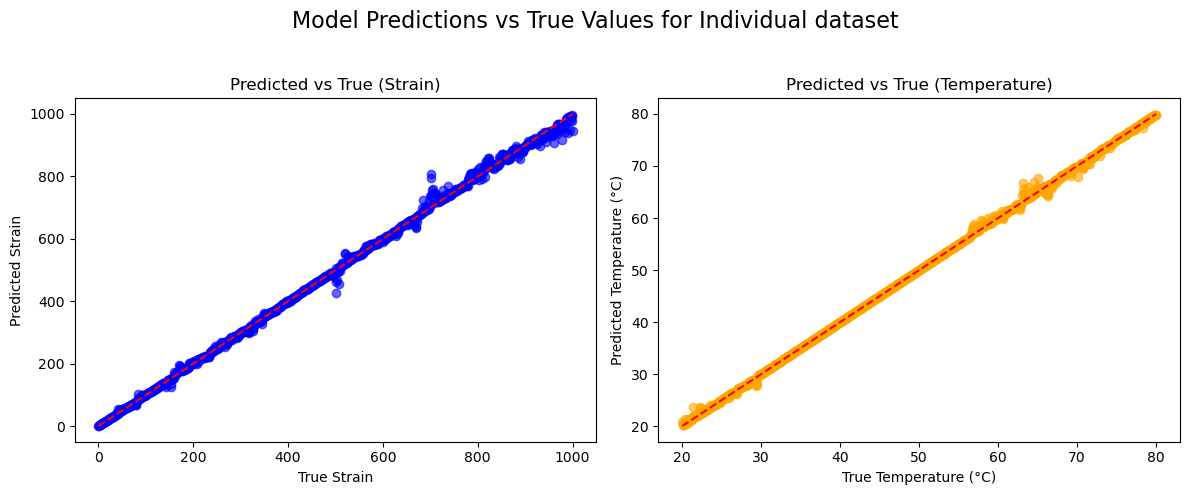

In [44]:
import matplotlib.pyplot as plt
# for Strain
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(y_strain_test, y_strain_pred, color="blue", alpha=0.6)
axes[0].plot([min(y_strain_test), max(y_strain_test)],[min(y_strain_test), max(y_strain_test)], 'r--')
axes[0].set_title("Predicted vs True (Strain)")
axes[0].set_xlabel("True Strain")
axes[0].set_ylabel("Predicted Strain")

# for Temperature
axes[1].scatter(y_temp_test, y_temp_pred, color="orange", alpha=0.6)
axes[1].plot([min(y_temp_test), max(y_temp_test)],[min(y_temp_test), max(y_temp_test)], 'r--')
axes[1].set_title("Predicted vs True (Temperature)")
axes[1].set_xlabel("True Temperature (°C)")
axes[1].set_ylabel("Predicted Temperature (°C)")
plt.tight_layout()
fig.suptitle("Model Predictions vs True Values for Individual dataset", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

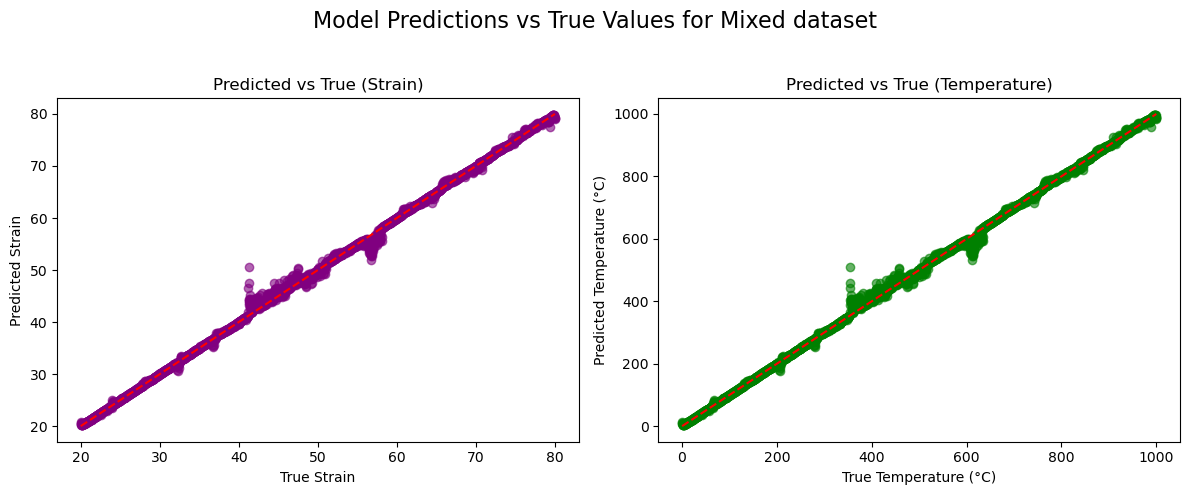

In [45]:
# for Strain in mixed dataset
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(y_both_test[:,0], y_both_pred[:,0], color="purple", alpha=0.6)
axes[0].plot([min(y_both_test[:,0]), max(y_both_test[:,0])],[min(y_both_test[:,0]), max(y_both_test[:,0])], 'r--')
axes[0].set_title("Predicted vs True (Strain)")
axes[0].set_xlabel("True Strain")
axes[0].set_ylabel("Predicted Strain")

# for Temperature in mixed dataset
axes[1].scatter(y_both_test[:,1], y_both_pred[:,1], color="green", alpha=0.6)
axes[1].plot([min(y_both_test[:,1]), max(y_both_test[:,1])],[min(y_both_test[:,1]), max(y_both_test[:,1])], 'r--')
axes[1].set_title("Predicted vs True (Temperature)")
axes[1].set_xlabel("True Temperature (°C)")
axes[1].set_ylabel("Predicted Temperature (°C)")
plt.tight_layout()
fig.suptitle("Model Predictions vs True Values for Mixed dataset", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

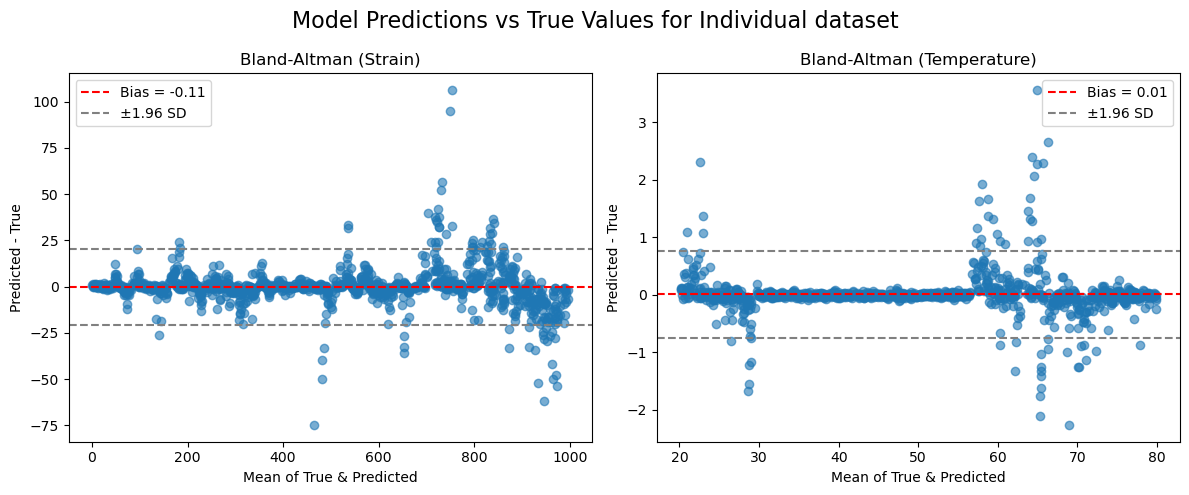

In [48]:
def bland_altman_plot(y_true, y_pred, ax, title):
    mean_vals = (y_true + y_pred) / 2
    diff = y_pred - y_true
    bias = np.mean(diff)
    loa = 1.96 * np.std(diff)

    ax.scatter(mean_vals, diff, alpha=0.6)
    ax.axhline(bias, color='red', linestyle='--', label=f'Bias = {bias:.2f}')
    ax.axhline(bias + loa, color='gray', linestyle='--', label='±1.96 SD')
    ax.axhline(bias - loa, color='gray', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel("Mean of True & Predicted")
    ax.set_ylabel("Predicted - True")
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
bland_altman_plot(y_strain_test, y_strain_pred, axes[0], "Bland-Altman (Strain)")
bland_altman_plot(y_temp_test, y_temp_pred, axes[1], "Bland-Altman (Temperature)")
fig.suptitle("Model Predictions vs True Values for Individual dataset", fontsize=16)
plt.tight_layout()
plt.show()


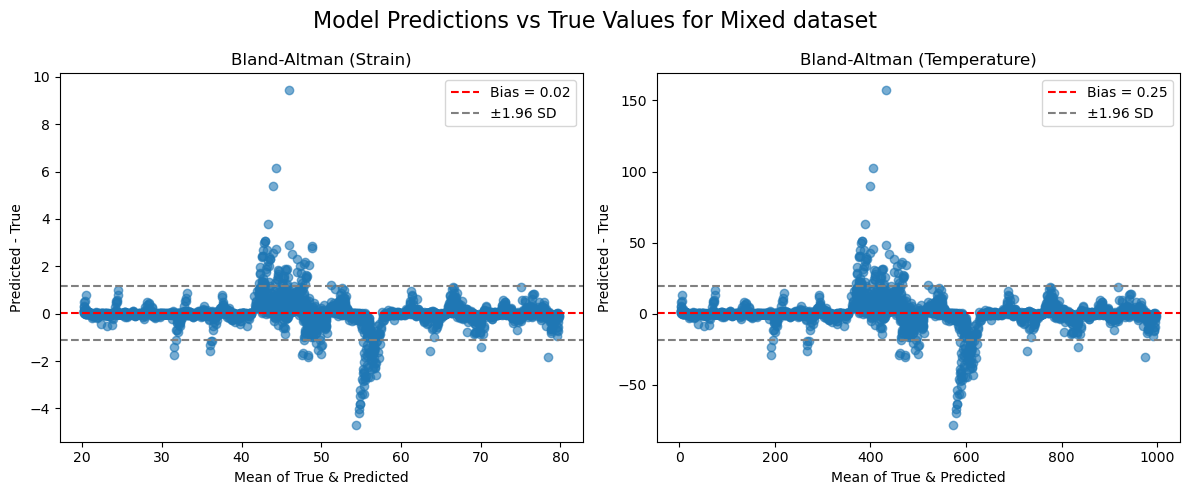

In [49]:
def bland_altman_plot(y_true, y_pred, ax, title):
    mean_vals = (y_true + y_pred) / 2
    diff = y_pred - y_true
    bias = np.mean(diff)
    loa = 1.96 * np.std(diff)

    ax.scatter(mean_vals, diff, alpha=0.6)
    ax.axhline(bias, color='red', linestyle='--', label=f'Bias = {bias:.2f}')
    ax.axhline(bias + loa, color='gray', linestyle='--', label='±1.96 SD')
    ax.axhline(bias - loa, color='gray', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel("Mean of True & Predicted")
    ax.set_ylabel("Predicted - True")
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
bland_altman_plot(y_both_test[:,0], y_both_pred[:,0], axes[0], "Bland-Altman (Strain)")
bland_altman_plot(y_both_test[:,1], y_both_pred[:,1], axes[1], "Bland-Altman (Temperature)")
fig.suptitle("Model Predictions vs True Values for Mixed dataset", fontsize=16)
plt.tight_layout()
plt.show()

#### Baseline Calibration

In [146]:
# For temepreture dependent
y_temp = featured_temp['Wavelength'].to_numpy()
x_temp = np.linspace(20,80,len(featured_temp)).reshape(-1,1)
reg_T = LinearRegression().fit(x_temp,y_temp)
k_T = reg_T.coef_
print(k_T)

[0.00126734]


In [147]:
# For Strain dependent dataset
y_strain = featured_strain['Wavelength'].to_numpy()
x_strain = np.linspace(0,1000,len(featured_strain)).reshape(-1,1)
reg_S = LinearRegression().fit(x_strain,y_strain)
k_S = reg_S.coef_
print(k_S)

[-0.0007097]


In [148]:
# For the dataset that depends on both
x1 = np.linspace(20,80,len(featured_both))
x2 = np.linspace(0,1000,len(featured_both))
x_both = np.column_stack([x1,x2])
y_both = featured_both['Wavelength'].to_numpy()
reg_B = LinearRegression().fit(x_both,y_both)
k_B = reg_B.coef_
print(k_B)

[-4.83793029e-05 -8.06321715e-04]
